# Analiza podatkov o receptih
V tej datoteki analiziramo podatke, pridobljenih s spletne strani Good Food. Stran ponuja širok nabor receptov za vse okuse in priložnosti, od preprostih vsakodnevnih obrokov do zapletenih gurmanskih specialitet. Vsak recept vsebuje informacije o zahtevnosti priprave, oceni in primernosti za različne diete.

V analizi bomo pregledali različne vidike receptov, kot so čas priprave, ocene, popularnost in različne prehranske preference. Cilj je ugotoviti, kateri recepti so najhitrejši, najbolj priljubljeni in kateri tip prehrane prejema najboljše ocene.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from collections import Counter

recepti = pd.read_csv("Projekt-UVP/Recepti.csv", index_col="ID")

Poglejmo, v kakšni obliki imamo naše podatke:

In [2]:
recepti.head(15)

,Ime,Ocena,Število ocen,Čas priprave,Level,Healthy,Vegetarian,Gluten free,Vegan
ID,,,,,,,,,
216723,Quick cauliflower cheese,4.40,18,30 mins,Easy,False,True,False,False
243122,Quick cheese straws,4.10,32,17 mins,Easy,False,True,False,False
214448,Quick kimchi,3.90,32,20 mins,Easy,False,False,False,False
237404,Quick sushi bowl,4.80,9,25 mins,Easy,False,False,False,False
226655,Quick mushroom & spinach lasagne,4.20,62,45 mins,Easy,False,True,False,False
235406,Quick beef & broccoli noodles,4.25,90,20 mins,Easy,False,False,False,False
238164,Carrot biryani,4.50,149,25 mins,Easy,False,True,False,False
266773,Quick tomato soup with cheesy garlic dippers,4.75,45,25 mins,Easy,False,False,False,False
218966,Quick hummus,3.40,20,12 mins,Easy,False,False,True,True


## Čas priprave receptov

### Pretvorba časa priprave v minute

Za lažjo analizo bomo čas priprave vseh receptov pretvorili v minute.


In [31]:
def pretvori_v_minute(recepti):
    cas_v_minutah = []
    for cas in recepti['Čas priprave']:
        minute = 0
        if isinstance(cas, str):
            cas = cas.lower().strip()
            if 'hr' in cas:
                ure = re.search(r'(\d+)\s*hr', cas)
                if ure:
                    minute += int(ure.group(1)) * 60
            if 'min' in cas:
                mins = re.search(r'(\d+)\s*min', cas)
                if mins:
                    minute += int(mins.group(1))
        cas_v_minutah.append(minute if minute > 0 else None)
    
    recepti['Čas v minutah'] = cas_v_minutah

pretvori_v_minute(recepti)

### Analiza časa priprave

In [8]:
recepti['Čas priprave'].value_counts()

Čas priprave
30 mins           292
40 mins           254
50 mins           234
45 mins           231
1 hr              230
                 ... 
120 hrs             1
1 hr 28 mins        1
48 hrs              1
50 hrs 50 mins      1
48 mins             1
Name: count, Length: 152, dtype: int64

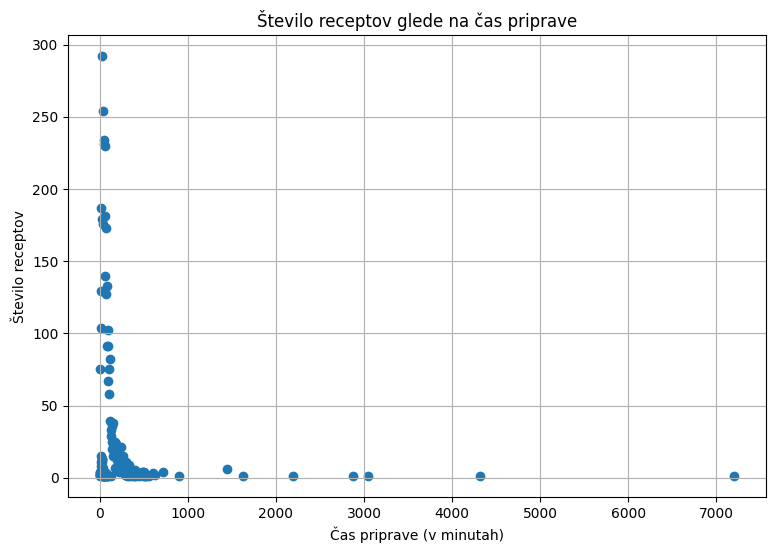

In [12]:
recepti_filtrirani = recepti.dropna(subset=['Čas v minutah'])
stevilo_receptov_po_casu = recepti_filtrirani['Čas v minutah'].value_counts().sort_index()

plt.figure(figsize=(9, 6))
plt.scatter(stevilo_receptov_po_casu.index, stevilo_receptov_po_casu.values)
plt.title('Število receptov glede na čas priprave')
plt.xlabel('Čas priprave (v minutah)')
plt.ylabel('Število receptov')
plt.grid(True)
plt.show()


Ugotovili smo, da je najpogostejši čas priprave 30 min, večina receptov pa potrebuje za pripravo med 30 min do ene ure. Graf nam prikaže razporeditev števila receptov glede na čas priprave. Opazimo, da pride do nekaterih večjih odstopanj od povprečja, zato lahko poiščemo recepte, za katere potrebujemo najmanj in najdalj časa za pripravo.

In [13]:
def najhitrejsi_recepti(recepti):
    najhitrejsi_cas = recepti['Čas v minutah'].min()

    najhitrejsi_recepti = recepti[recepti['Čas v minutah'] == najhitrejsi_cas]
    
    print(f"Najhitrejši čas priprave: {najhitrejsi_cas} minut")
    print("Recepti s tem časom priprave:\n")
    print(najhitrejsi_recepti[['Ime', 'Čas priprave', 'Ocena', 'Število ocen']].to_string(index=False))
    print('\n')

def najdaljsi_recepti(recepti):
    najdaljsi_cas = recepti['Čas v minutah'].max()
    
    najdaljsi_recepti = recepti[recepti['Čas v minutah'] == najdaljsi_cas]
    
    print(f"Najdaljši čas priprave: {najdaljsi_cas} minut")
    print("Recepti s tem časom priprave:\n")
    print(najdaljsi_recepti[['Ime', 'Čas priprave', 'Ocena', 'Število ocen']].to_string(index=False))

najhitrejsi_recepti(recepti)
najdaljsi_recepti(recepti)

Najhitrejši čas priprave: 2.0 minut
Recepti s tem časom priprave:

                          Ime Čas priprave  Ocena  Število ocen
Two-minute breakfast smoothie       2 mins   4.60           101
 Beetroot, feta & grain salad       2 mins   4.15             8


Najdaljši čas priprave: 7200.0 minut
Recepti s tem časom priprave:

              Ime Čas priprave  Ocena  Število ocen
Sourdough starter      120 hrs   4.15            46


### Čas priprave glede na stopnjo zahtevnosti

Pregledali bomo, kakšen je povprečni čas priprave za različne stopnje težavnosti receptov.

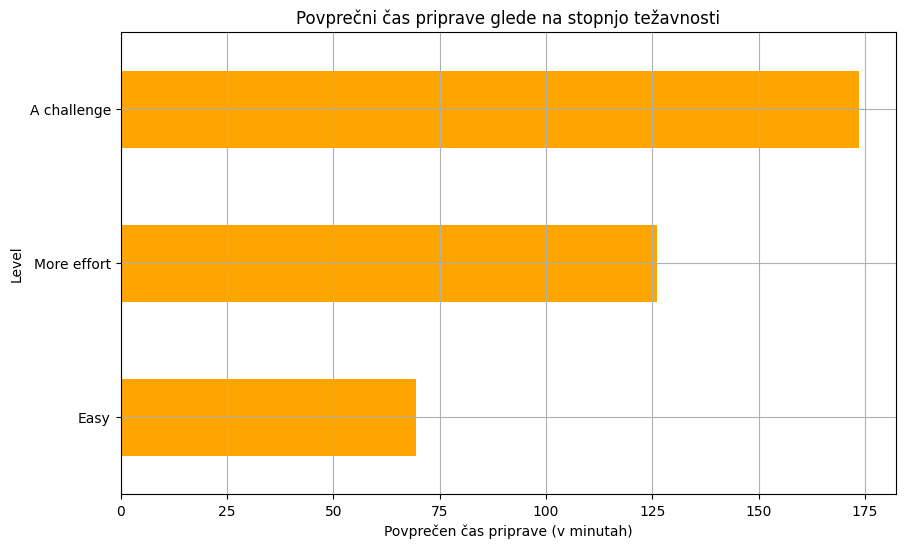

Najhitreje pripravljena vrsta jedi: Easy (v povprečju 69.54 minut)
Najdlje pripravljena vrsta jedi: A challenge (v povprečju 173.54 minut)


In [32]:
def tipi_jedi_po_casu_priprave(recepti):
    povprecni_casi = recepti.groupby('Level')['Čas v minutah'].mean().sort_values()

    plt.figure(figsize=(10, 6))
    povprecni_casi.plot(kind='barh', color='orange')
    plt.title('Povprečni čas priprave glede na stopnjo težavnosti')
    plt.xlabel('Povprečen čas priprave (v minutah)')
    plt.ylabel('Level')
    plt.grid(True)
    plt.show()

    najhitrejsi = povprecni_casi.idxmin()
    najpočasnejši = povprecni_casi.idxmax()
    
    print(f"Najhitreje pripravljena vrsta jedi: {najhitrejsi} (v povprečju {povprecni_casi.min():.2f} minut)")
    print(f"Najdlje pripravljena vrsta jedi: {najpočasnejši} (v povprečju {povprecni_casi.max():.2f} minut)")

tipi_jedi_po_casu_priprave(recepti)

## Ocenjenost receptov

Povprečna ocena receptov je 4.43615639026695.


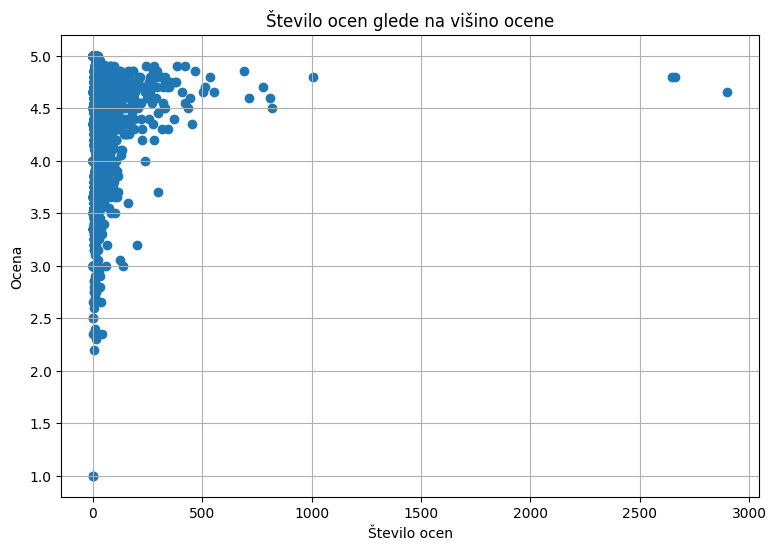

In [24]:
povprečje = float(recepti['Ocena'].mean())
print(f'Povprečna ocena receptov je {povprečje}.')

plt.figure(figsize=(9, 6))
plt.scatter(recepti['Število ocen'], recepti['Ocena'])
plt.title('Število ocen glede na višino ocene')
plt.xlabel('Število ocen')
plt.ylabel('Ocena')
plt.grid(True)
plt.show()

### Najbolje ocenjeni recepti
Izpisali bomo recepte, ki so dosegli oceno 5.0, in analizirali, kateri recepti imajo najboljšo kombinacijo ocene in števila ocen.

In [25]:
def ocena_pet(recepti):
    petka = []
    for _, recept in recepti.iterrows():
        ocena = recept['Ocena']
        if ocena == 5.0:
            petka.append(recept)

    print(f'Število najbolje ocenjenih receptov: {len(petka)}\n')
    print('Prvi trije najbolje ocenjeni recepti so:\n')
    for pet in petka[:3]:
        print(pet[['Ime', 'Ocena', 'Število ocen', 'Čas priprave']])
        print('\n')

zmagovalci = ocena_pet(recepti)

Število najbolje ocenjenih receptov: 746

Prvi trije najbolje ocenjeni recepti so:

Ime             Quick mushroom noodle soup
Ocena                                  5.0
Število ocen                             2
Čas priprave                       15 mins
Name: 798795, dtype: object


Ime             All in one apple pudding
Ocena                                5.0
Število ocen                           1
Čas priprave                        1 hr
Name: 839945, dtype: object


Ime             All-American T-bone
Ocena                           5.0
Število ocen                      2
Čas priprave                17 mins
Name: 216464, dtype: object




In [26]:
def kvaliteta_receptov(recepti, minimalna_ocena=4.5, minimalno_stevilo_ocen=20):
    
    kvalitetni_recepti = recepti[
        (recepti['Ocena'] >= minimalna_ocena) & 
        (recepti['Število ocen'] >= minimalno_stevilo_ocen)
        ]
    
    print(f"Število kvalitetnih receptov: {len(kvalitetni_recepti)}")
    print(kvalitetni_recepti[['Ime', 'Ocena', 'Število ocen', 'Čas priprave']].to_string(index=False))
    
kvaliteta_receptov(recepti)

Število kvalitetnih receptov: 739
                                                                     Ime  Ocena  Število ocen   Čas priprave
                                                          Carrot biryani   4.50           149        25 mins
                            Quick tomato soup with cheesy garlic dippers   4.75            45        25 mins
                                                10-minute couscous salad   4.70           218        10 mins
                                              Nutty chicken satay strips   4.60           172        20 mins
                                                 Quick chilli bean wraps   4.70            31        20 mins
                                          Easy risotto with bacon & peas   4.75           378        45 mins
                                              All-in-one posh lamb balti   4.75            20  4 hrs 55 mins
                                 All-in-one cabbage with beans & carrots   4.75            26 

### Popularni recepti
Popularnost receptov bomo določili glede na število ocen, ter izpisali top 15 najbolj ocenjenih receptov.


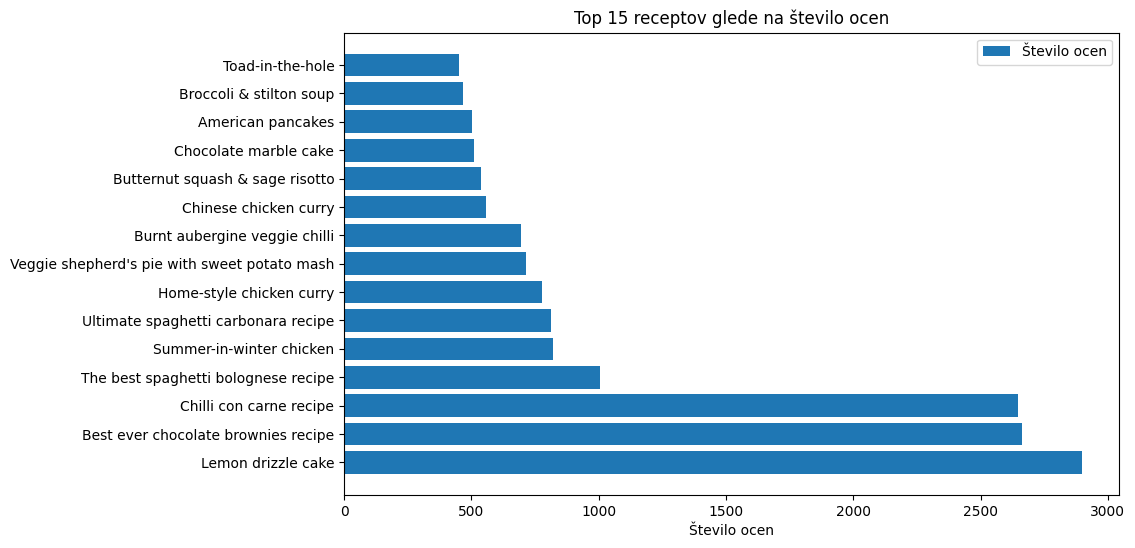

In [29]:
top_recepti = recepti.sort_values(by='Število ocen', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(top_recepti['Ime'], top_recepti['Število ocen'], label='Število ocen')

ax.set_xlabel('Število ocen')
ax.set_title('Top 15 receptov glede na število ocen')
ax.legend()

plt.show()

## Prehranske preference

<Axes: >

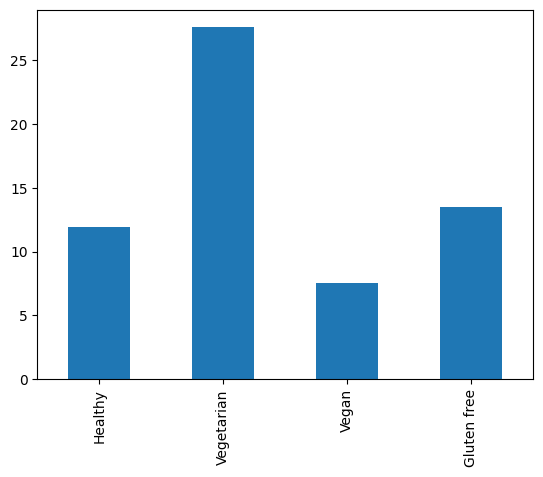

In [43]:
diet_prefs = recepti[['Healthy','Vegetarian', 'Vegan', 'Gluten free']].mean() * 100
diet_prefs.plot(kind='bar')

In [41]:
def analiza_zdravih_receptov(recepti):
    atributi = ['Healthy', 'Vegetarian', 'Gluten free', 'Vegan']
    analiza_rezultati = {}
    
    for atribut in atributi:
        for vrednost in [True, False]:
            skupina_receptov = recepti[recepti[atribut] == vrednost]
            povprecna_ocena = np.mean(skupina_receptov['Ocena'].apply(np.float64))
            analiza_rezultati[f'{atribut} = {vrednost}'] = povprecna_ocena
    
    return analiza_rezultati

zdravi_recepti_analiza = analiza_zdravih_receptov(recepti)
for atribut, povprecna_ocena in zdravi_recepti_analiza.items():
    print(f"Povprečna ocena za {atribut}: {povprecna_ocena:.2f}")

Povprečna ocena za Healthy = True: 4.32
Povprečna ocena za Healthy = False: 4.45
Povprečna ocena za Vegetarian = True: 4.39
Povprečna ocena za Vegetarian = False: 4.45
Povprečna ocena za Gluten free = True: 4.45
Povprečna ocena za Gluten free = False: 4.43
Povprečna ocena za Vegan = True: 4.37
Povprečna ocena za Vegan = False: 4.44


## Najpogostejše besede v imenih receptov
Izdelali bomo graf najpogostejših besed, ki se pojavljajo v imenih receptov.

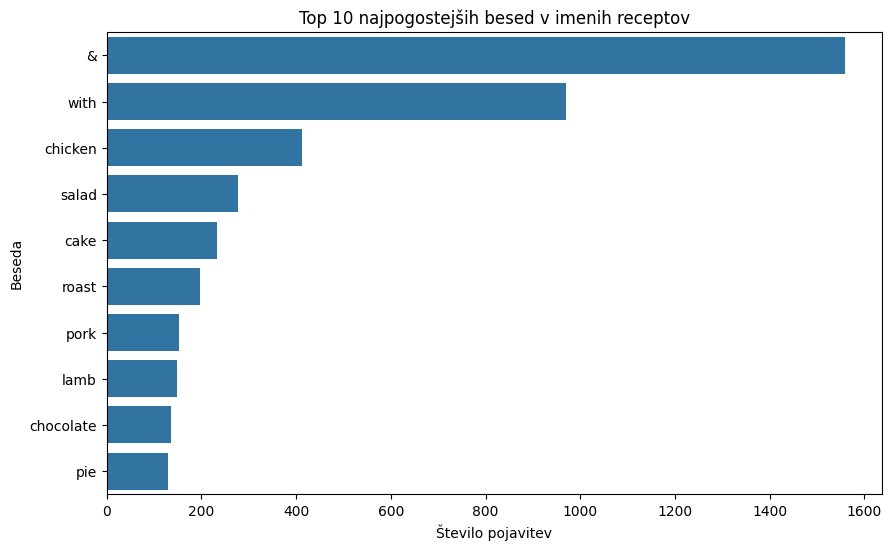

In [44]:
besede = ' '.join(recepti['Ime']).lower().split()
besede_stevilo = Counter(besede)
top_besede = dict(besede_stevilo.most_common(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_besede.values()), y=list(top_besede.keys()))
plt.title('Top 10 najpogostejših besed v imenih receptov')
plt.xlabel('Število pojavitev')
plt.ylabel('Beseda')
plt.show()

## Zaključek

Analiza nam je pokazala raznolike vidike receptov z Good Food spletne strani. Ugotovili smo, kateri recepti so najbolj ocenjeni, najhitrejši za pripravo, in kateri tipi jedi zahtevajo več časa. Prav tako smo analizirali priljubljenost različnih prehranskih preferenc.
